<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets_reddit.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets_reddit.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [112]:
import praw
import secrets_reddit

In [113]:
# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(client_id=secrets_reddit.REDDIT_API_CLIENT_ID,
                    client_secret=secrets_reddit.REDDIT_API_CLIENT_SECRET,
                    user_agent=secrets_reddit.REDDIT_API_USER_AGENT)

In [114]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected output you will see ar from `r/machinelearning` unless otherwise specified.

In [4]:
subreddit = reddit.subreddit("machinelearning")

What is the display name of the subreddit?

In [5]:
subreddit.display_name

'machinelearning'

<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [6]:
subreddit.title

'Machine Learning'

<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [7]:
subreddit.description

'**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**\n--------\n+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)\n--------\n+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)\n--------\n+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)\n--------\n+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)\n--------\n***[@slashML on Twitter](https://twitter.com/slashML)***\n--------\n***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***\n--------\n**Beginners:**\n--------\nPlease have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)\n\n[Metacademy](http://www.metacademy.org) is a great resourc

<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [8]:
# try run this line, what do you see? press q once you are done
?subreddit.top 

Signature:
subreddit.top(
    *,
    time_filter: str = 'all',
    **generator_kwargs: Union[str, int, Dict[str, str]],
) -> Iterator[Any]
Docstring:
Return a :class:`.ListingGenerator` for top items.

:param time_filter: Can be one of: ``"all"``, ``"day"``, ``"hour"``,
    ``"month"``, ``"week"``, or ``"year"`` (default: ``"all"``).

:raises: :py:class:`ValueError` if ``time_filter`` is invalid.

Additional keyword arguments are passed in the initialization of
:class:`.ListingGenerator`.

This method can be used like:

.. code-block:: python

    reddit.domain("imgur.com").top(time_filter="week")
    reddit.multireddit(redditor="samuraisam", name="programming").top(time_filter="day")
    reddit.redditor("spez").top(time_filter="month")
    reddit.redditor("spez").comments.top(time_filter="year")
    reddit.redditor("spez").submissions.top(time_filter="all")
    reddit.subreddit("all").top(time_filter="hour")
File:      ~/.local/lib/python3.9/site-packages/praw/models/listing/mixins/ba

In [9]:
for submission in subreddit.top(limit=10):
    print(submission.title)

[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [10]:
for submission in subreddit.top(time_filter="week",limit=10):
    print(submission.title)

[P] Finetuned Diffusion: multiple fine-tuned Stable Diffusion models, trained on different styles
[P] Transcribe any podcast episode in just 1 minute with optimized OpenAI/whisper
[D] DALL·E to be made available as API, OpenAI to give users full ownership rights to generated images
[P] Made a text generation model to extend stable diffusion prompts with suitable style cues
[R] APPLE research: GAUDI — a neural architect for immersive 3D scene generation
[P] Learn diffusion models with Hugging Face course 🧨
[R] Reincarnating Reinforcement Learning (NeurIPS 2022) - Google Brain
[N] Adversarial Policies Beat Professional-Level Go AIs
[P] Fine Tuning Stable Diffusion: Naruto Character Edition
[N] Meta AI | Evolutionary-scale prediction of atomic level protein structure with a language model


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

**There are a lot of information for describing the questions inside a subreddit. I think that the use of them depends on the answer that we're looking for. One interest use case by this kind of data should be to build an interest score of a specific topic, weighting the differente score (positive and negative ones) inside a subreddit.
Also use case for NLP should e think, in order to extract the sentiment for a specific topi.**

Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [40]:
for submission in subreddit.top(time_filter="all",limit=10):
    print("For the following question: ", submission.title," the score (number of upvotes) is: ",submission.score)
    print("The author is: ", submission.author)
    print("This question has the following number of comments: ",submission.num_comments)
    print("---"*30)

For the following question:  [Project] From books to presentations in 10s with AR + ML  the score (number of upvotes) is:  7541
The author is:  cyrildiagne
This question has the following number of comments:  186
------------------------------------------------------------------------------------------
For the following question:  [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition  the score (number of upvotes) is:  5712
The author is:  TheInsaneApp
This question has the following number of comments:  129
------------------------------------------------------------------------------------------
For the following question:  [R] First Order Motion Model applied to animate paintings  the score (number of upvotes) is:  4692
The author is:  programmerChilli
This question has the following number of comments:  110
------------------------------------------------------------------------------------------
For the following qu

💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

**From what i've seen in the documentation i don't see so much related to ethical data concerns that can add some kind of biases.**

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [44]:
%%time
from praw.models import MoreComments

# Create an empty list do be fill in the for loop
top_comments = []

# Loop over the top 10 posts of all time
for submission in subreddit.top(limit=10):
    # For every top 10 post, extract comments
    for top_level_comment in submission.comments:
        # Extract all the comments in all the pages available
        if isinstance(top_level_comment, MoreComments):
            continue
        # Add the text of every comment of every top 10 posts to the list
        top_comments.append(top_level_comment.body)

CPU times: user 348 ms, sys: 5.89 ms, total: 354 ms
Wall time: 26 s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [45]:
len(top_comments)

746

In [57]:
import random
import pandas as pd

[random.choice(top_comments) for i in range(5)]

['This is so trippy. Love it. Great stuff OP!.',
 'This is some crazy Tony stark shit',
 'This reminds me of boomer comics',
 '> discussions have become disrespectful. Schmidhuber calls Hinton a thief, Gebru calls LeCun a white supremacist, Anandkumar calls Marcus a sexist, everybody is under attack, but nothing is improved.\n\nYoshua Bengio is the liberal Canadian knight that will deliver this community.',
 '[cursed_cristiano_ronaldo_statue.mp4](https://streamable.com/rpxeuf)']

In [58]:
ris = []
for i in top_comments:
    ris.append(len(i.split()))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

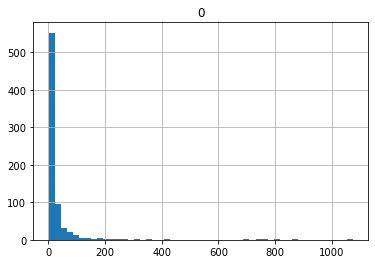

In [61]:
pd.DataFrame(ris).hist(bins=50)

In [62]:
pd.DataFrame(ris).describe()

,0
count,746.000000
mean,29.520107
std,83.255878
min,1.000000
25%,5.000000
50%,10.000000
75%,23.000000
max,1074.000000


<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data?

**In my opinion is interesting to notice that the most of the comments have a bunch of few words: it's seems more an use of the platformo as a sort of online messagging service (like Twitter), than other. The half of the comments extracted has 10 words.**

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [107]:
# Enter the subreddit desidered
sub = reddit.subreddit("TSLA")

top_comments_tsla = []

for submission in sub.top(limit=10):
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        top_comments_tsla.append(top_level_comment.body)

In [108]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

170

In [109]:
[random.choice(top_comments_tsla) for i in range(3)]

['I like how it is right now, where the price is very similar to the market cap in billions.',
 'Get a job, Sir!',
 'It’s going to drop to 400s first. Buy up around there, and continue to buy puts']

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

Analyze the distribution of the lenght of the comment

In [67]:
ris = []
for i in top_comments_tsla:
    ris.append(len(i.split()))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

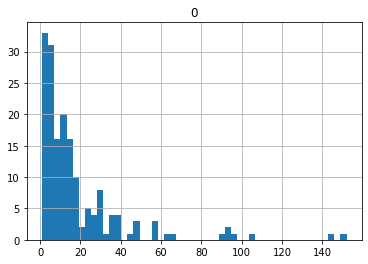

In [68]:
pd.DataFrame(ris).hist(bins=50)

In [69]:
pd.DataFrame(ris).describe()

,0
count,170.000000
mean,18.764706
std,23.799034
min,1.000000
25%,6.000000
50%,12.000000
75%,20.750000
max,152.000000


The median here is a little higher (12>10) than the previous subreddit analysis: more words for every comments. Anyway we canno't say that this difference is statistycally significant.

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [70]:
from transformers import pipeline

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [71]:
sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [72]:
comment = random.choice(top_comments_tsla)

In [73]:
comment

'Partially agree. It will reach $2000 in 2025. \n\nI had around the same 12K in 2017- took some profit in late Jan. Came back again at $530 today. You need some profit taking as well its good for everybody'

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [74]:
sentiment = sentiment_model(comment)

What is the type of the output `sentiment`?

In [75]:
sentiment

[{'label': 'NEGATIVE', 'score': 0.9829100966453552}]

In [76]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: Partially agree. It will reach $2000 in 2025. 

I had around the same 12K in 2017- took some profit in late Jan. Came back again at $530 today. You need some profit taking as well its good for everybody
Predicted Label is NEGATIVE and the score is 0.983


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

**The score represents the sentiment regards the comment analyze.**

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [105]:
%%writefile top_tlsa_comment_sentiment.py

import secrets_reddit
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=secrets_reddit.REDDIT_API_CLIENT_ID,        
        client_secret=secrets_reddit.REDDIT_API_CLIENT_SECRET,
        user_agent=secrets_reddit.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline("sentiment-analysis")
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    subreddit = get_subreddit("TSLA")
    comments = get_comments(subreddit)
    comment = random.choice(comments)
    sentiment = run_sentiment_analysis(comment)
    
    print(f'The comment: {comment}')
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Overwriting top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [106]:
!python top_tlsa_comment_sentiment.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
The comment: Enjoy getting fired.
Predicted Label is POSITIVE and the score is 0.992


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

Doing a groupby on the day and count how many posts.

💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

If there is a large distribution of poster, i suppose there will be a wider spread in the topic discussed and in the sentiment. Opposite for the case of a small concentration: in this case bias can ruined our analysis.

Due to a super busy week of work i wasn't able to finish the assignment, i'm sorry. I really would like to see how did you solve the last two questions.
Thanks